# All credits of this notebook goes to the original author [vishalyo990]!


Notebook: https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine


## **This notebook tutorial is for those who are beginners to machine learning.**

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

**1. Random Forest Classifier**

**2. Stochastic Gradient Descent Classifier**

**3. Support Vector Classifier(SVC) **

*Then I use cross validation evaluation technique to optimize the model performance.*

**1. Grid Search CV**

**2. Cross Validation Score**

## **If you find this notebook useful then please upvote.**

In [74]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [44]:
#Loading dataset
wine = pd.read_csv('./../../data/historical_dataset.csv') #dataset

In [45]:
#Let's check how the data is distributed
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Let's do some plotting to know how the data columns are distributed in the dataset**

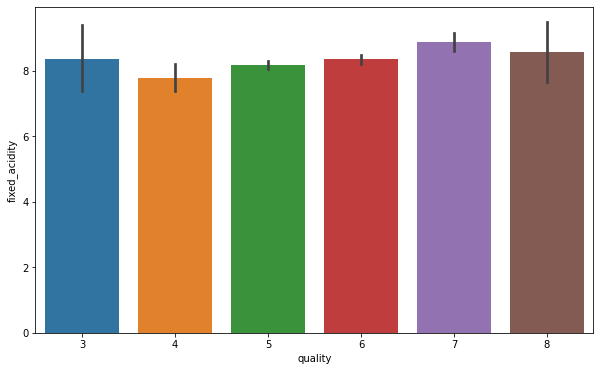

In [47]:
#modelling
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine)

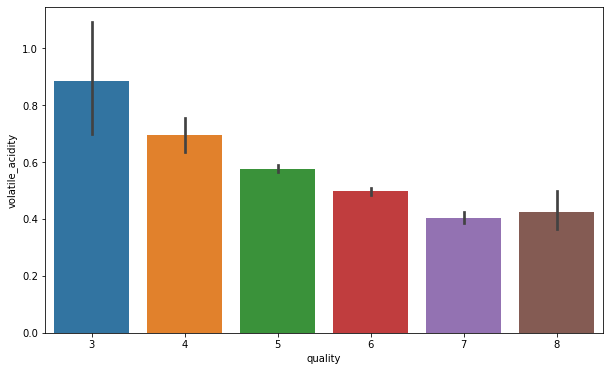

In [48]:
#modelling
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = wine)

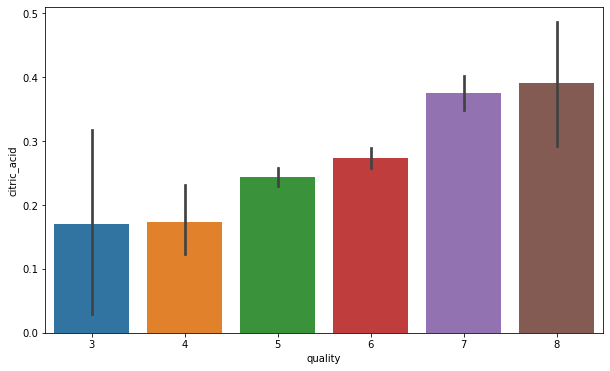

In [49]:
#modelling
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine)

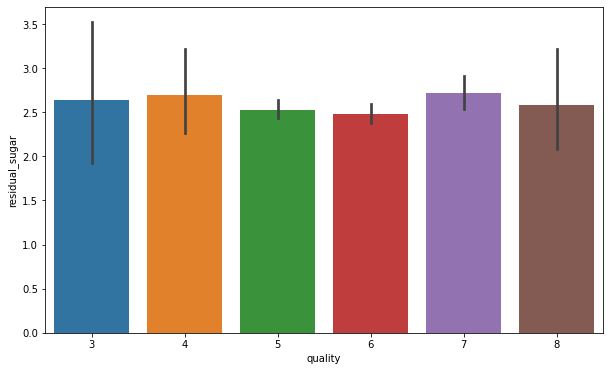

In [50]:
#modelling
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = wine)

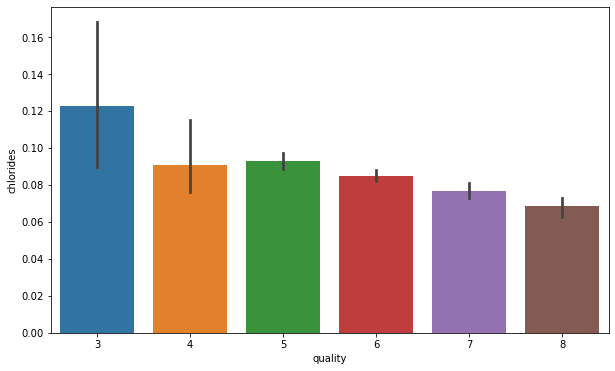

In [51]:
#modelling
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

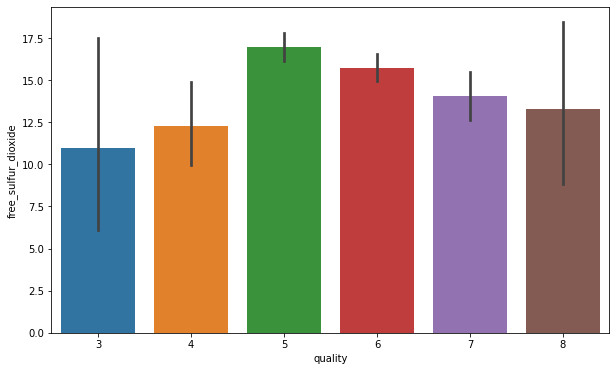

In [52]:
#modelling
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = wine)

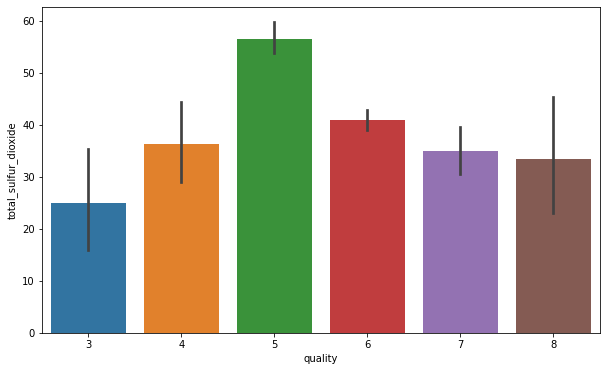

In [53]:
#modelling
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = wine)

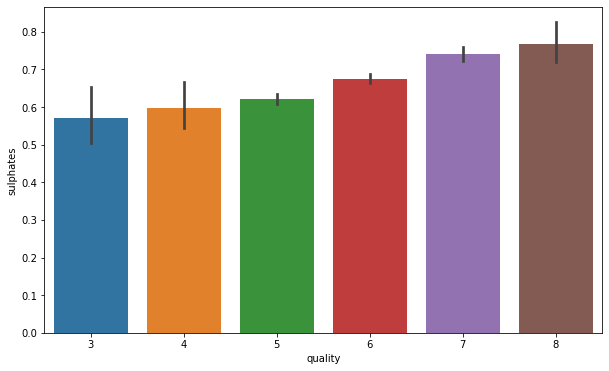

In [54]:
#modelling
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

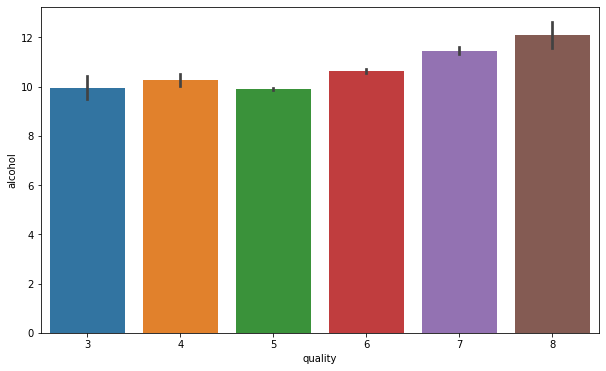

In [55]:
#modelling
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [56]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [57]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [58]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [59]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

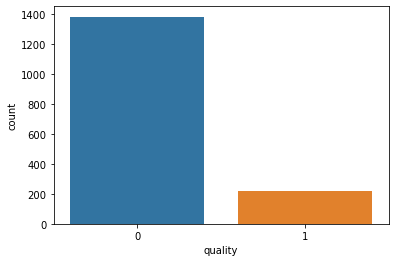

In [60]:
sns.countplot(wine['quality'])

In [61]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [62]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [64]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [65]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [66]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.75      0.51      0.61        47

    accuracy                           0.90       320
   macro avg       0.84      0.74      0.78       320
weighted avg       0.90      0.90      0.90       320



#### Random forest gives the accuracy of 87%

In [67]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 23  24]]




## Stochastic Gradient Decent Classifier

In [68]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
#model=sgd
pred_sgd = sgd.predict(X_test)

In [69]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       273
           1       0.41      0.47      0.44        47

    accuracy                           0.82       320
   macro avg       0.66      0.68      0.66       320
weighted avg       0.83      0.82      0.83       320



#### 84% accuracy using stochastic gradient descent classifier

In [70]:
print(confusion_matrix(y_test, pred_sgd))

[[241  32]
 [ 25  22]]


## Support Vector Classifier

In [71]:
svc = SVC()
svc.fit(X_train, y_train)
#model=svc
pred_svc = svc.predict(X_test)

In [72]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



#### Support vector classifier gets 86%

### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest and SGD

In [73]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8561392716535433